<a href="https://colab.research.google.com/github/spidervamsi/MedicalTweetsAnalysis/blob/master/Copy_Sentiment_Analysis_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
!pip install fasttext
!pip install emoji

In [44]:
import pandas as pd
import numpy as np
import fasttext
import re
import sys
import os
import nltk
nltk.download('punkt')
import csv
import datetime
from bs4 import BeautifulSoup
import itertools
import emoji
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:

# emoticons
def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
  
      ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions
def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [0]:
import re
import string
from bs4 import BeautifulSoup

#for tweet in tweet_data:
def preprocess_tweet(tweet):
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
   
    #Special case not handled previously.
    tweet = tweet.replace('\x92',"'")
    
    #Removal of hastags/account
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    
    #Removal of address
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    
    #Removal of Punctuation
    tweet = ' '.join(re.sub("[\.\,\!\?\<\>\:\;\-\=]", " ", tweet).split())
    
    #Lower case
    tweet = tweet.lower()
    
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    
    # Standardizing words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    
    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    
    #Deal with emojis
    tweet = emoji.demojize(tweet)

    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())

    return tweet
    

In [47]:


count = 0
usecols = (2,4)
dataframe = pd.read_table("/content/task1_training.tsv",usecols=usecols)
with open('SE_train.txt', 'w') as txtoutfile:
  for tweet in dataframe.iterrows():
    if tweet[1][1] == 0:
      count = count+1
    if tweet[1][1] == 0 and count > 100:
      continue
    tweet_txt = preprocess_tweet(tweet[1][0])
    if tweet_txt == "":
      continue
    txtoutfile.write('__label__'+str(tweet[1][1])+"\t"+ tweet_txt+'\n' )


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/oewqnWJA4k" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/29HB3YRChW" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [48]:
usecols = (2,4)
dataframe = pd.read_table("/content/task1_validation.tsv",usecols=usecols)
with open('SE_valid.txt', 'w') as txtoutfile:
  for tweet in dataframe.iterrows():
    tweet_txt = preprocess_tweet(tweet[1][0])
    if tweet[1][1] == 1 and tweet_txt != "":
      txtoutfile.write('__label__'+str(tweet[1][1])+"\t"+ tweet_txt+'\n' )


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/WJMMsU6ixl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/x4nWvT6pCg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/lzZH0S5pES" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Sou

In [0]:
results = []
def train(training_data_path,validation_data_path,samples=1):
    print('Training start')
    hyper_params = {"lr": 0.01,
                    "epoch": 100,
                    "wordNgrams": 2,
                    "dim": 100}

    count = 0
    usecols = (2,4)
    dataframe = pd.read_table("/content/task1_training.tsv",usecols=usecols)
    with open('SE_train.txt', 'w') as txtoutfile:
      for tweet in dataframe.iterrows():
        if tweet[1][1] == 0:
          count = count+1
        if tweet[1][1] == 0 and count > 100 + 50*samples:
          continue
        tweet_txt = preprocess_tweet(tweet[1][0])
        if tweet_txt == "":
          continue
        txtoutfile.write('__label__'+str(tweet[1][1])+"\t"+ tweet_txt+'\n' )


                            
    # Train the model.
    model = fasttext.train_supervised(input=training_data_path, **hyper_params)
    print("Model trained with the hyperparameter \n {}".format(hyper_params))

    model_acc_validation_set = model.test(validation_data_path)
    
    # DISPLAY ACCURACY OF TRAINED MODEL
    results.append(model_acc_validation_set)
    text_line =  "validation:" + str(model_acc_validation_set[1]) + '\n'
    print(text_line)
    return model


In [55]:
result=[]
for i in range(10):
  model = train("/content/SE_train.txt","/content/SE_valid.txt",1)
  usecols = (2,4)
  y_pred = []
  y_test = []
  dataframe = pd.read_table("/content/task1_validation.tsv",usecols=usecols)
  with open('SE_valid.txt', 'w') as txtoutfile:
    for tweet in dataframe.iterrows():
      tweet_txt = preprocess_tweet(tweet[1][0])
      if tweet[1][1] == 1 and tweet_txt != "":
        # txtoutfile.write('__label__'+str(tweet[1][1])+"\t"+ tweet_txt+'\n' )
        y_test.append('__label__'+str(tweet[1][1]))
        y_pred.append(model.predict(tweet_txt)[0][0])
  result.append(classification_report(y_test,y_pred))

Training start


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/oewqnWJA4k" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/29HB3YRChW" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan



/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/WJMMsU6ixl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/x4nWvT6pCg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/lzZH0S5pES" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Sou

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}
validation:nan

Training start
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 100, 'wordNgrams': 2, 'dim': 100}


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/WJMMsU6ixl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/x4nWvT6pCg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://t.co/lzZH0S5pES" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Sou

              precision    recall  f1-score   support

  __label__0       0.00      0.00      0.00         0
  __label__1       1.00      0.03      0.06        35

    accuracy                           0.03        35
   macro avg       0.50      0.01      0.03        35
weighted avg       1.00      0.03      0.06        35



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(y_pred)

[(('__label__0',), array([0.50018305])), (('__label__0',), array([0.50061214])), (('__label__0',), array([0.50028217])), (('__label__0',), array([0.50030708])), (('__label__0',), array([0.50016987])), (('__label__0',), array([0.50084418])), (('__label__0',), array([0.50020492])), (('__label__0',), array([0.50027847])), (('__label__0',), array([0.50027704])), (('__label__0',), array([0.50026548])), (('__label__0',), array([0.50029737])), (('__label__0',), array([0.50012589])), (('__label__0',), array([0.50034559])), (('__label__0',), array([0.50047398])), (('__label__0',), array([0.50012791])), (('__label__0',), array([0.50042921])), (('__label__0',), array([0.50012493])), (('__label__0',), array([0.50034362])), (('__label__0',), array([0.50025022])), (('__label__0',), array([0.50038767])), (('__label__0',), array([0.50027084])), (('__label__0',), array([0.50010437])), (('__label__0',), array([0.50019008])), (('__label__0',), array([0.50032443])), (('__label__0',), array([0.5002445])), 

In [54]:
g = []
for result in results:
  print(result)
  g.append(result[1]*100)

(35, 0.02857142857142857, 0.02857142857142857)


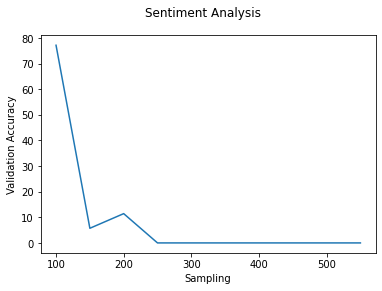

In [0]:
import matplotlib.pyplot as plt
plt.plot(list(range(100,100+50*len(g),50)),g)
plt.ylabel('Validation Accuracy')
plt.xlabel('Sampling')
plt.suptitle('Sentiment Analysis')
plt.show()